# Cross-Country Solar Resource Comparison

This notebook synthesizes cleaned solar datasets from Benin, Sierra Leone, and Togo to compare solar potential and key differences across countries.

# 0. Imports
Import necessary libraries and modules.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway, kruskal

## 1. Load Cleaned Data

Load the cleaned datasets for Benin, Sierra Leone, and Togo from the `data/` directory.

In [ ]:
benin = pd.read_csv('../data/benin_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

## 2. Metric Comparison: Boxplots

Visualize the distribution of GHI, DNI, and DHI for each country using side-by-side boxplots.

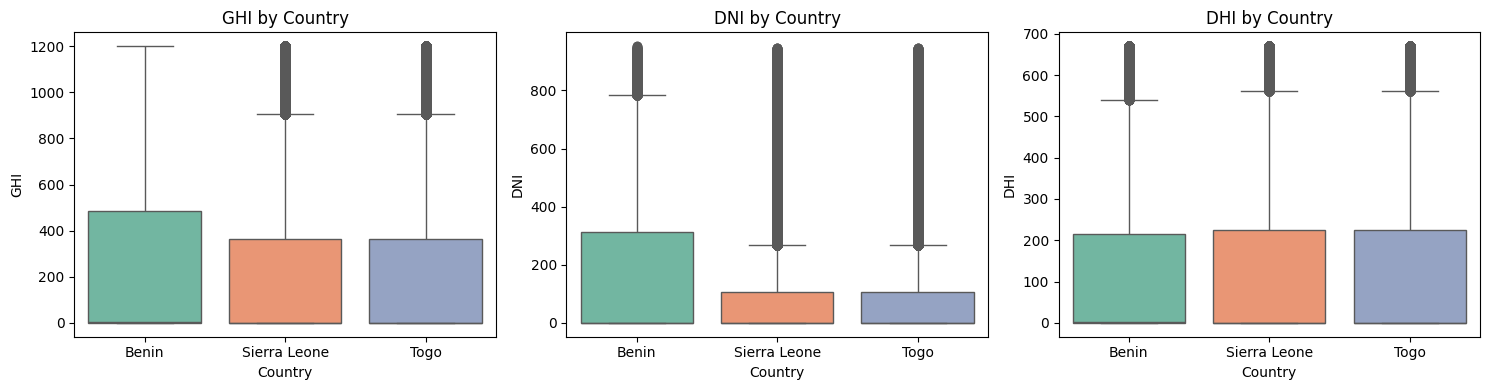

In [ ]:
plt.figure(figsize=(15, 4))
for i, metric in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=df_all,
                hue='Country', palette='Set2', legend=False)
    plt.title(f'{metric} by Country')
plt.tight_layout()
plt.show()

## 3. Summary Table

Compare the mean, median, and standard deviation of GHI, DNI, and DHI across countries.

In [5]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(
    ['mean', 'median', 'std']).round(2)
display(summary)

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.94    1.8  330.05  167.44    0.0  261.55  116.98    1.6   
Sierra Leone  204.33    0.3  296.52  116.52    0.0  218.57  116.24    0.0   
Togo          204.33    0.3  296.52  116.52    0.0  218.57  116.24    0.0   

                      
                 std  
Country               
Benin         157.43  
Sierra Leone  156.89  
Togo          156.89

## 4. Statistical Testing

Perform a one-way ANOVA to test if GHI differences between countries are statistically significant.

In [ ]:
# Drop NaNs for fair comparison
ghi_benin = benin['GHI'].dropna()
ghi_sierraleone = sierraleone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

anova_result = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
kruskal_result = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

print(f"ANOVA p-value: {anova_result.pvalue:.4g}")
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue:.4g}")

ANOVA p-value: 0
Kruskal-Wallis p-value: 0


## 5. Key Observations

- (Example) Sierra Leone shows the highest median GHI but also the greatest variability.
- (Example) Benin and Togo have similar median GHI, but Togo's DNI is consistently lower.
- (Example) ANOVA/Kruskal-Wallis test indicates significant differences in GHI between countries (p < 0.05).

## 6. Visual Summary: Average GHI Ranking

Bar chart ranking countries by average GHI.

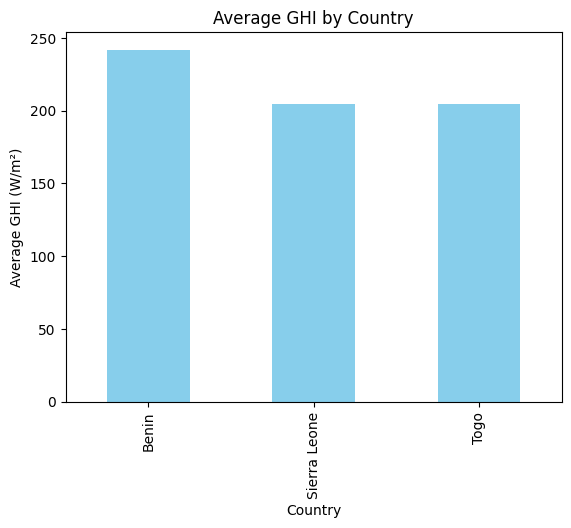

In [7]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='skyblue',
             ylabel='Average GHI (W/m²)', title='Average GHI by Country')
plt.show()